### TopN热门商品推荐

In [1]:
from pyspark import SparkContext,SparkConf
from operator import add,itemgetter
from pyspark.sql import SparkSession,Row
from pandas import *
from pyspark.sql.functions import *
from pyspark.ml.feature import Bucketizer
from pyspark.sql.types import *
import time,math,os
from Evaluator import Evaluator
class topNModel(object):
    def __init__(self,df,topNDf=None):
        self.topNDf = topNDf
        self.df = df
        
    def train(self):
        item_count = self.df.groupBy('item').agg(count('*').alias('item_count'))
        self.topNDf = item_count.sort(desc('item_count')).limit(10).select('item')
    
    def recommend(self):
        userIds = ratingDf.select('user').distinct()
        return userIds.crossJoin(self.topNDf)
    
def evaluate(evaluator):
    precise = evaluator.precision()
    coverage = evaluator.coverage()
    popularity = evaluator.popularity()
#     popularity = 5
    recall = evaluator.recall()
    return precise,recall,coverage,popularity
                                                 
if __name__ == "__main__": 
    PYSPARK_PYTHON = "/usr/bin/python2.7"
    os.environ["PYSPARK_PYTHON"] = PYSPARK_PYTHON
    conf = SparkConf().setAppName("itemCF").setMaster("yarn")
    conf.set('spark.yarn.dist.files',
            'file:/root/hadoop-2.6/spark/python/lib/pyspark.zip,file:/root/hadoop-2.6/spark/python/lib/py4j-0.10.4-src.zip')
    conf.set('spark.executor.cores','30')
    conf.set('spark.executor.memory','95g')
    conf.set('spark.executor.instances','8')
    conf.set('spark.sql.shuffle.partitions','400')
    conf.set('spark.default.parallelism','200')
#     conf.set("spark.shuffle.file.buffer","128k").set("spark.reducer.maxSizeInFlight","96M")
    spark = SparkSession.builder\
        .config(conf=conf) \
        .getOrCreate()
    sc=spark.sparkContext 
    sc.setLogLevel('WARN')
    start = time.time()
    inputPath = 'data/ml-1m/ratings.dat'
    schema = StructType([
            StructField("user", StringType(), True),
            StructField("item", StringType(), True),
            StructField("rating", DoubleType(), True),
            StructField("timestamp", LongType(), True)])
    ratingRdd = sc.textFile(inputPath).map(lambda line:line.split("::"))\
                    .map(lambda x:(x[0],x[1],float(x[2]),long(x[3])))
    ratingDf = spark.createDataFrame(data=ratingRdd,schema=schema)
    #     ratingDf,_ = ratingDf.randomSplit([1.0,9.0],seed=40)
    ratingDf = ratingDf.repartition(300)
    ratingDf.printSchema()
    ratingDf.show(5)
    n = ratingDf.count()
#     ratingDf = ratingDf.withColumn('score',col('rating')*0+1).select('user','item','score')    
    print 'total lines: %s' %n
    train,test = ratingDf.randomSplit([4.0,1.0],seed=40)
    train.cache()
    test.cache()
    topModel = topNModel(train)
    topModel.train()
    pre = topModel.recommend()
    evaluator = Evaluator(train,test,pre)
    (precise,recall,coverage,popularity) = evaluate(evaluator)
    end = time.time()
    print ('precise:%2.2f%%,  recall:%2.2f%%,  coverage:%2.2f%%,  popularity:%2.2f, time: %s s'
            %(precise*100,recall*100,coverage*100,popularity,end-start))


root
 |-- user: string (nullable = true)
 |-- item: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: long (nullable = true)

+----+----+------+---------+
|user|item|rating|timestamp|
+----+----+------+---------+
|   4|2028|   5.0|978294230|
|   7|1270|   4.0|978234581|
|  10|   2|   5.0|979168267|
|  10|1654|   5.0|979168346|
|  13|1204|   5.0|978202201|
+----+----+------+---------+
only showing top 5 rows

total lines: 1000209
precise:9.26%,  recall:2.79%,  coverage:0.27%,  popularity:7.71, time: 101.981282949 s


### 基于随机方法推荐系统 spark实现

In [ ]:
from pyspark import SparkContext,SparkConf
from operator import add,itemgetter
from pyspark.sql import SparkSession,Row
from pandas import *
from pyspark.sql.functions import *
from pyspark.ml.feature import Bucketizer
from pyspark.sql.types import *
import time,math,os
from Evaluator import Evaluator
class randomModel(object):
    def __init__(self,df,topNDf=None):
        self.topNDf = topNDf
        self.df = df
        
    def train(self):
        item_count = self.df.groupBy('item').agg(count('*').alias('item_count'))
        self.topNDf = item_count.sort(desc('item_count')).limit(10).select('item')
    
    def recommend(self):
        itemIds = ratingDf.select('item').distinct()
        userIds = ratingDf.select('user').distinct()
        df = spark.createDataFrame(data=[],schema=itemIds.schema)
        n = userIds.count()
        for i in range(n):
            df = df.union(itemIds.sample(True,0.8,42).limit(10)
           
        return userIds.crossJoin(self.topNDf)
    
def evaluate(evaluator):
    precise = evaluator.precision()
    coverage = evaluator.coverage()
    popularity = evaluator.popularity()
#     popularity = 5
    recall = evaluator.recall()
    return precise,recall,coverage,popularity
                                                 
if __name__ == "__main__": 
    PYSPARK_PYTHON = "/usr/bin/python2.7"
    os.environ["PYSPARK_PYTHON"] = PYSPARK_PYTHON
    conf = SparkConf().setAppName("itemCF").setMaster("yarn")
    conf.set('spark.yarn.dist.files',
            'file:/root/hadoop-2.6/spark/python/lib/pyspark.zip,file:/root/hadoop-2.6/spark/python/lib/py4j-0.10.4-src.zip')
    conf.set('spark.executor.cores','30')
    conf.set('spark.executor.memory','95g')
    conf.set('spark.executor.instances','8')
    conf.set('spark.sql.shuffle.partitions','400')
    conf.set('spark.default.parallelism','200')
#     conf.set("spark.shuffle.file.buffer","128k").set("spark.reducer.maxSizeInFlight","96M")
    spark = SparkSession.builder\
        .config(conf=conf) \
        .getOrCreate()
    sc=spark.sparkContext 
    sc.setLogLevel('WARN')
    start = time.time()
    inputPath = 'data/ml-1m/ratings.dat'
    schema = StructType([
            StructField("user", StringType(), True),
            StructField("item", StringType(), True),
            StructField("rating", DoubleType(), True),
            StructField("timestamp", LongType(), True)])
    ratingRdd = sc.textFile(inputPath).map(lambda line:line.split("::"))\
                    .map(lambda x:(x[0],x[1],float(x[2]),long(x[3])))
    ratingDf = spark.createDataFrame(data=ratingRdd,schema=schema)
    #     ratingDf,_ = ratingDf.randomSplit([1.0,9.0],seed=40)
    ratingDf = ratingDf.repartition(300)
    ratingDf.printSchema()
    ratingDf.show(5)
    n = ratingDf.count()
#     ratingDf = ratingDf.withColumn('score',col('rating')*0+1).select('user','item','score')    
    print 'total lines: %s' %n
    train,test = ratingDf.randomSplit([4.0,1.0],seed=40)
    train.cache()
    test.cache()
    topModel = topNModel(train)
    topModel.train()
    pre = topModel.recommend()
    evaluator = Evaluator(train,test,pre)
    (precise,recall,coverage,popularity) = evaluate(evaluator)
    end = time.time()
    print ('precise:%2.2f%%,  recall:%2.2f%%,  coverage:%2.2f%%,  popularity:%2.2f, time: %s s'
            %(precise*100,recall*100,coverage*100,popularity,end-start))


In [25]:
dataset = spark.range(0, 100).select((col("id") % 3).alias("key"))
sampled = dataset.sampleBy("key", fractions={0: 0.2, 1: 0.2})
sampled.groupBy("key").count().orderBy("key").show()

+---+-----+
|key|count|
+---+-----+
|  0|    4|
|  1|    3|
+---+-----+



###  基于物品的协同过滤算法 本地实现

In [90]:
##### !/usr/bin/env python
#-*- coding:utf-8 -*-
############################
#File Name: recommendator.py
#Author: yanbin
#Mail: yanbin918@gmail.com
#Created Time: 2017-08-17 10:
'''
inputPath : 文件数据路径
split_char ： 文件数据每行分隔符（分隔后取前两个作为用户和物品）
读取文件生成dataset类
dataset.user_item_dict：{user1:{item1:1,item2:1},user2:{item1:1}}
dataset.user_item_matrix：M[user][item]=1,if user对item有行为 else M[user][item]=0
dataset.userIndexer,dataset.itemIndexer. dataset索引器，作用通过字符ID 找到 矩阵索引
result_pt ： 预测结果存入路径
userCF_prediction_result_pt ：userCF预测结果保存变量名
itemCF_prediction_result_pt ：itemCF预测结果保存变量名
random_prediction_result_pt ：random预测结果保存变量名
topn_prediction_result_pt ：topn预测结果保存变量名
lfm_prediction_result_pt ：lfm预测结果保存变量名
'''
import sys
sys.path.append('../')
from ml_latest_small.data import *
from Collaborative_Filter.itemBased import ItemCFModel,ItemCF
from Collaborative_Filter.userBased import UserCFModel,UserCF
from Collaborative_Filter.lfmBased import lfmModel,lfm
from Comparision.randomBased import RandomModel
from Comparision.topnBased import topnModel
import pickle
import multiprocessing
import os
from Evaluation.Evaluator import Evaluator
import time
def load_result(path):
    pkl_file = open(path, 'rb')
    prediction_dict = pickle.load(pkl_file)
    # pprint.pprint(data)
    pkl_file.close()
    return prediction_dict

def evaluate(evaluator):
    precise = evaluator.precision()
    coverage = evaluator.coverage()
    popularity = evaluator.popularity()
#     popularity = 5
    recall = evaluator.recall()
    return precise,recall,coverage,popularity

def itemCF_predict(train_dict,test_dict,ItemCF_model,K):
    #recommendation for every user in train_Dataset
    users = train_dict.keys()
    user_nums = len(users)
    i = 0
    prediction_dict ={}
    for user in users:
        prediction_dict[user]=ItemCF_model.recommendation(user,config={'K':K,'N':10}).keys()
    return prediction_dict

start = time.time()
train_dict = train.rdd.map(lambda x:(x['user'],(x['item'],x['rating'])))\
             .groupByKey().mapValues(dict).collectAsMap()
test_dict = test.rdd.map(lambda x:(x['user'],(x['item'],x['rating'])))\
             .groupByKey().mapValues(dict).collectAsMap()
itemCF_local = ItemCF()
#triain ItemCF_model
print "训练基于物品协同过滤算法模型........"
ItemCF_model=itemCF_local.train(train_dict)
for K in [5,10,20,40,60,80,100,120]:
    prediction_dict = itemCF_predict(train_dict,test_dict,ItemCF_model,K) 
    evaluator = Evaluator(train_dict,test_dict,prediction_dict,N=10)
    (precise,recall,coverage,popularity) = evaluate(evaluator)
    end = time.time()
    print ('NN:%3d,  precise:%2.2f%%,  recall:%2.2f%%,  coverage:%2.2f%%,  popularity:%2.2f, time: %s s'
            %(K,precise*100,recall*100,coverage*100,popularity,end-start))
    start = time.time()    

训练基于物品协同过滤算法模型........
NN:  5,  precise:29.88%,  recall:9.02%,  coverage:20.26%,  popularity:7.23, time: 1608.23068404 s
NN: 10,  precise:30.92%,  recall:9.33%,  coverage:17.82%,  popularity:7.31, time: 1410.09897399 s
NN: 20,  precise:30.29%,  recall:9.14%,  coverage:15.34%,  popularity:7.37, time: 1415.47815514 s
NN: 40,  precise:29.35%,  recall:8.86%,  coverage:13.69%,  popularity:7.42, time: 1427.98589611 s
NN: 60,  precise:29.09%,  recall:8.78%,  coverage:12.74%,  popularity:7.43, time: 1418.730021 s
NN: 80,  precise:28.83%,  recall:8.70%,  coverage:12.06%,  popularity:7.43, time: 1423.06928992 s
NN:100,  precise:28.60%,  recall:8.63%,  coverage:11.57%,  popularity:7.43, time: 1416.06087899 s
NN:120,  precise:28.44%,  recall:8.59%,  coverage:11.52%,  popularity:7.42, time: 1424.51447105 s


###  基于物品的协同过滤算法 spark实现

In [9]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
#__author__:yanbin
from pyspark import SparkContext,SparkConf
from operator import add,itemgetter
from pyspark.sql import SparkSession,Row
from pandas import *
from pyspark.sql.functions import *
from pyspark.ml.feature import Bucketizer
from pyspark.sql.types import *
import time
import math
class ItemCFModel(object):  
    def __init__(self,df,item_pair_sim=None,spark=None):
        self.df = df
        self.item_pair_sim = item_pair_sim

    def itemSimilarity(self):
        # RDD[(uid,(aid,score))] 
        user_item_score = self.df.rdd.map(lambda x:(x['user'],[x['item'],x['rating']]))
        item_score_pair = user_item_score.join(user_item_score)\
                        .map(lambda x:((x[1][0][0],x[1][1][0]),(x[1][0][1],x[1][1][1])))
        item_pair_ALL = item_score_pair.map(lambda f:(f[0], f[1][0] * f[1][1])).reduceByKey(add,300)
        item_pair_XX_YY = item_pair_ALL.filter(lambda f:f[0][0] == f[0][1])
        item_pair_XY = item_pair_ALL.filter(lambda f:f[0][0] != f[0][1])
        #RDD[(aid1,score11 * score11 + score21 * score21)] 
        item_XX_YY = item_pair_XX_YY.map(lambda f:(f[0][0], f[1]))
        #RDD(aid1,((aid1,aid2,XY),XX))
        item_XY_XX = item_pair_XY.map(lambda f:(f[0][0], (f[0][0], f[0][1], f[1]))).join(item_XX_YY) 
        #RDD[(aid2,((aid1,aid2,
        #           score11 * score12 + score21 * score22,score11 * score11 + score21 * score21),
        #           score12 * score12 + score22 * score22))] 
        item_XY_XX_YY = item_XY_XX.map(lambda f:(f[1][0][1],(f[1][0][0],f[1][0][1],f[1][0][2],f[1][1]))).join(item_XX_YY)  
        # item_XY_XX_YY中的(aid1,aid2,XY,XX,YY)) 
        # RDD[(aid1,aid2,
        # score11 * score12 + score21 * score22,score11 * score11 + score21 * score21,score12 * score12 + score22 * score22)]       
        item_pair_XY_XX_YY = item_XY_XX_YY.map(lambda f:(f[1][0][0], f[1][0][1], f[1][0][2], f[1][0][3], f[1][1]))  
        # item_pair_XY_XX_YY为(aid1,aid2,XY / math.sqrt(XX * YY)) 
        # RDD[(aid1,aid2,
        # score11 * score12 + score21 * score22 / math.sqrt((score11 * score11 + score21 * score21)*(score12 * score12 + score22 * score22))] 
        item_pair_sim = item_pair_XY_XX_YY.map(lambda f :(f[0], (f[1], f[2] / math.sqrt(f[3] * f[4]))))  
        return item_pair_sim
    

    def train(self):
        item_pair_sim = self.itemSimilarity()
        item_pair_sim.cache()  
        self.item_pair_sim=item_pair_sim
    



def recommend(df,item_pair_sim,NN=100,topN =10,Normalization=False):
    def itemNN(item_pair_sim,NN=100,Normalization=False):
        item_sim = item_pair_sim.filter(lambda f:f[1][1]>0.05)\
                            .groupByKey()\
                            .mapValues(list)
        if Normalization:
            def norm(x):
                m =  __builtin__.max([i[1] for i in x])
                l = []
                for i in x:
                    l.append((i[0],i[1]/m))
                return l
            item_sim = item_sim.mapValues(lambda x:norm(x))
        item_simNN = item_sim.mapValues(lambda x:sorted(x,key=itemgetter(1),reverse=True)[:NN])\
                            .collectAsMap()
        return item_simNN
    
    def getOrElse(f,item_sim_bd):
        items_sim = item_sim_bd.value.get(f[0][1]) 
        if items_sim is None:
            items_sim = [("0", 0.0)]
        for w in items_sim:
            yield ((f[0][0],w[0]),w[1]*f[1])
            
    user_item_score = df.rdd.map(lambda x:((x['user'],x['item']),x['rating']))
    item_sim_bd = sc.broadcast(itemNN(item_pair_sim,NN=NN,Normalization=Normalization))
#     /* 
#      * 提取item_sim_user_score为((user,item2),sim * score) 
#      * RDD[(user,item2),sim * score] 
#      */  

    user_item_simscore = user_item_score.flatMap(lambda f:getOrElse(f,item_sim_bd))\
                                        .filter(lambda f:f[1]> 0.03)  
#       /*
#      * 聚合user_item_simscore为 (user,（item2,sim1 * score1 + sim2 * score2）)
#      * 假设user观看过两个item,评分分别为score1和score2，item2是与user观看过的两个item相似的item,相似度分别为sim1，sim2 
#      * RDD[(user,item2),sim1 * score1 + sim2 * score2）)] 
#      */  
    user_item_rank = user_item_simscore.reduceByKey(add,1000)  

#     /* 
#      * 过滤用户已看过的item,并对user_item_rank基于user聚合 
#      * RDD[(user,CompactBuffer((item2,rank2）,(item3,rank3)...))] 
#      */  
    user_items_ranks = user_item_rank.subtractByKey(user_item_score)\
                                     .map(lambda f:(f[0][0], (f[0][1], f[1])))\
                                     .groupByKey()  
#     /* 
#      * 对user_items_ranks基于rank降序排序，并提取topN,其中包括用户已观看过的item 
#      * RDD[(user,ArrayBuffer((item2,rank2）,...,(itemN,rankN)))] 
#      */  
    user_items_ranks_desc = user_items_ranks.mapValues(list)\
                            .mapValues(lambda x:sorted(x,key=itemgetter(1),reverse=True)[:topN])
    return user_items_ranks_desc

from Evaluator import Evaluator
def evaluate(evaluator):
    precise = evaluator.precision()
    coverage = evaluator.coverage()
    popularity = evaluator.popularity()
    recall = evaluator.recall()
    return precise,recall,coverage,popularity

if __name__ == "__main__": 
    import os
    PYSPARK_PYTHON = "/usr/bin/python2.7"
    os.environ["PYSPARK_PYTHON"] = PYSPARK_PYTHON
    conf = SparkConf().setAppName("itemCF").setMaster("yarn")
    conf.set('spark.yarn.dist.files',
            'file:/root/hadoop-2.6/spark/python/lib/pyspark.zip,file:/root/hadoop-2.6/spark/python/lib/py4j-0.10.4-src.zip')
    conf.set('spark.executor.cores','30')
    conf.set('spark.executor.memory','95g')
    conf.set('spark.executor.instances','8')
    conf.set('spark.sql.shuffle.partitions','400')
    conf.set('spark.default.parallelism','200')
#     conf.set("spark.shuffle.file.buffer","128k").set("spark.reducer.maxSizeInFlight","96M")
    spark = SparkSession.builder\
        .config(conf=conf) \
        .getOrCreate()
    sc=spark.sparkContext 
    sc.setLogLevel('WARN')
    start = time.time()
    inputPath = 'data/ml-1m/ratings.dat'
    schema = StructType([
            StructField("user", StringType(), True),
            StructField("item", StringType(), True),
            StructField("rating", DoubleType(), True),
            StructField("timestamp", LongType(), True)])
    ratingRdd = sc.textFile(inputPath).map(lambda line:line.split("::"))\
                    .map(lambda x:(x[0],x[1],float(x[2]),long(x[3])))
    ratingDf = spark.createDataFrame(data=ratingRdd,schema=schema)
    #     ratingDf,_ = ratingDf.randomSplit([1.0,9.0],seed=40)
    ratingDf = ratingDf.repartition(300)
    ratingDf.printSchema()
    ratingDf.show(5)
    n = ratingDf.count()
#     ratingDf = ratingDf.withColumn('score',col('rating')*0+1).select('user','item','score')    
    print 'total lines: %s' %n
    train,test = ratingDf.randomSplit([4.0,1.0],seed=40)
    train.cache()
    test.cache()
    itemCF = ItemCFModel(df=train,spark=spark)
    itemCF.train()
    end = time.time()
    print 'model trainning spend: %s s' %(end-start)
    start = time.time()
    for NN in [5,10,20,40,60,80,100,120]:
        recTopN = recommend(train,itemCF.item_pair_sim,NN=NN,topN=10,Normalization=False)
        pre = spark.createDataFrame(data=recTopN.flatMapValues(lambda x:x).map(lambda x:(x[0],x[1][0],x[1][1])),
                                    schema=['user','item','rating'])
        evaluator = Evaluator(train,test,pre)
        (precise,recall,coverage,popularity) = evaluate(evaluator)
        end = time.time()
        print ('NN:%3d,  precise:%2.2f%%,  recall:%2.2f%%,  coverage:%2.2f%%,  popularity:%2.2f, time: %s s'
                %(NN,precise*100,recall*100,coverage*100,popularity,end-start))
        pre.write.parquet(partitionBy='user',path='data/ml-1m/result/itemCF/itcf_'+str(NN),mode='ignore')
        start = time.time()
            

root
 |-- user: string (nullable = true)
 |-- item: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: long (nullable = true)

+----+----+------+---------+
|user|item|rating|timestamp|
+----+----+------+---------+
|3093|   2|   3.0|969650197|
|3095|2174|   4.0|970774487|
|3097|2412|   1.0|969637398|
|3100|3005|   3.0|969591786|
|3101|1210|   4.0|969582345|
+----+----+------+---------+
only showing top 5 rows

total lines: 1000209
model trainning spend: 14.8884420395 s
NN:  5,  precise:29.59%,  recall:8.93%,  coverage:22.00%,  popularity:7.14, time: 463.315440893 s
NN: 10,  precise:30.75%,  recall:9.28%,  coverage:19.07%,  popularity:7.23, time: 41.4911849499 s
NN: 20,  precise:30.33%,  recall:9.15%,  coverage:16.95%,  popularity:7.30, time: 54.15498209 s
NN: 40,  precise:29.57%,  recall:8.93%,  coverage:14.91%,  popularity:7.35, time: 77.9435040951 s
NN: 60,  precise:29.08%,  recall:8.78%,  coverage:13.47%,  popularity:7.37, time: 97.563338995 s
NN: 80,  pre

In [8]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
#__author__:yanbin
from pyspark import SparkContext,SparkConf
from operator import add,itemgetter
from pyspark.sql import SparkSession,Row
from pandas import *
from pyspark.sql.functions import *
from pyspark.ml.feature import Bucketizer
from pyspark.sql.types import *
import time
import math
class ItemCFModel(object):  
    def __init__(self,df,item_pair_sim=None,spark=None):
        self.df = df
        self.item_pair_sim = item_pair_sim

    def itemSimilarity(self):
        # RDD[(uid,(aid,score))] 
        user_item_score = self.df.rdd.map(lambda x:(x['user'],[x['item'],x['rating']]))
        item_score_pair = user_item_score.join(user_item_score)\
                        .map(lambda x:((x[1][0][0],x[1][1][0]),(x[1][0][1],x[1][1][1])))
        item_pair_ALL = item_score_pair.map(lambda f:(f[0], f[1][0] * f[1][1])).reduceByKey(add,300)
        item_pair_XX_YY = item_pair_ALL.filter(lambda f:f[0][0] == f[0][1])
        item_pair_XY = item_pair_ALL.filter(lambda f:f[0][0] != f[0][1])
        #RDD[(aid1,score11 * score11 + score21 * score21)] 
        item_XX_YY = item_pair_XX_YY.map(lambda f:(f[0][0], f[1]))
        #RDD(aid1,((aid1,aid2,XY),XX))
        item_XY_XX = item_pair_XY.map(lambda f:(f[0][0], (f[0][0], f[0][1], f[1]))).join(item_XX_YY) 
        #RDD[(aid2,((aid1,aid2,
        #           score11 * score12 + score21 * score22,score11 * score11 + score21 * score21),
        #           score12 * score12 + score22 * score22))] 
        item_XY_XX_YY = item_XY_XX.map(lambda f:(f[1][0][1],(f[1][0][0],f[1][0][1],f[1][0][2],f[1][1]))).join(item_XX_YY)  
        # item_XY_XX_YY中的(aid1,aid2,XY,XX,YY)) 
        # RDD[(aid1,aid2,
        # score11 * score12 + score21 * score22,score11 * score11 + score21 * score21,score12 * score12 + score22 * score22)]       
        item_pair_XY_XX_YY = item_XY_XX_YY.map(lambda f:(f[1][0][0], f[1][0][1], f[1][0][2], f[1][0][3], f[1][1]))  
        # item_pair_XY_XX_YY为(aid1,aid2,XY / math.sqrt(XX * YY)) 
        # RDD[(aid1,aid2,
        # score11 * score12 + score21 * score22 / math.sqrt((score11 * score11 + score21 * score21)*(score12 * score12 + score22 * score22))] 
        item_pair_sim = item_pair_XY_XX_YY.map(lambda f :(f[0], (f[1], f[2] / math.sqrt(f[3] * f[4]))))  
        return item_pair_sim
    

    def train(self):
        item_pair_sim = self.itemSimilarity()
        item_pair_sim.cache()  
        self.item_pair_sim=item_pair_sim
    



def recommend(df,item_pair_sim,NN=100,topN =10,Normalization=False):
    def itemNN(item_pair_sim,NN=100,Normalization=False):
        item_sim = item_pair_sim.filter(lambda f:f[1][1]>0.05)\
                            .groupByKey()\
                            .mapValues(list)
        if Normalization:
            def norm(x):
                m =  __builtin__.max([i[1] for i in x])
                l = []
                for i in x:
                    l.append((i[0],i[1]/m))
                return l
            item_sim = item_sim.mapValues(lambda x:norm(x))
        item_simNN = item_sim.mapValues(lambda x:sorted(x,key=itemgetter(1),reverse=True)[:NN])\
                            .collectAsMap()
        return item_simNN
    
    def getOrElse(f,item_sim_bd):
        items_sim = item_sim_bd.value.get(f[0][1]) 
        if items_sim is None:
            items_sim = [("0", 0.0)]
        for w in items_sim:
            yield ((f[0][0],w[0]),w[1]*f[1])
            
    user_item_score = df.rdd.map(lambda x:((x['user'],x['item']),x['rating']))
    item_sim_bd = sc.broadcast(itemNN(item_pair_sim,NN=NN,Normalization=Normalization))
#     /* 
#      * 提取item_sim_user_score为((user,item2),sim * score) 
#      * RDD[(user,item2),sim * score] 
#      */  

    user_item_simscore = user_item_score.flatMap(lambda f:getOrElse(f,item_sim_bd))\
                                        .filter(lambda f:f[1]> 0.03)  
#       /*
#      * 聚合user_item_simscore为 (user,（item2,sim1 * score1 + sim2 * score2）)
#      * 假设user观看过两个item,评分分别为score1和score2，item2是与user观看过的两个item相似的item,相似度分别为sim1，sim2 
#      * RDD[(user,item2),sim1 * score1 + sim2 * score2）)] 
#      */  
    user_item_rank = user_item_simscore.reduceByKey(add,1000)  

#     /* 
#      * 过滤用户已看过的item,并对user_item_rank基于user聚合 
#      * RDD[(user,CompactBuffer((item2,rank2）,(item3,rank3)...))] 
#      */  
    user_items_ranks = user_item_rank.subtractByKey(user_item_score)\
                                     .map(lambda f:(f[0][0], (f[0][1], f[1])))\
                                     .groupByKey()  
#     /* 
#      * 对user_items_ranks基于rank降序排序，并提取topN,其中包括用户已观看过的item 
#      * RDD[(user,ArrayBuffer((item2,rank2）,...,(itemN,rankN)))] 
#      */  
    user_items_ranks_desc = user_items_ranks.mapValues(list)\
                            .mapValues(lambda x:sorted(x,key=itemgetter(1),reverse=True)[:topN])
    return user_items_ranks_desc

from Evaluator import Evaluator
def evaluate(evaluator):
    precise = evaluator.precision()
    coverage = evaluator.coverage()
    popularity = evaluator.popularity()
    recall = evaluator.recall()
    return precise,recall,coverage,popularity

if __name__ == "__main__": 
    import os
    PYSPARK_PYTHON = "/usr/bin/python2.7"
    os.environ["PYSPARK_PYTHON"] = PYSPARK_PYTHON
    conf = SparkConf().setAppName("itemCF").setMaster("yarn")
    conf.set('spark.yarn.dist.files',
            'file:/root/hadoop-2.6/spark/python/lib/pyspark.zip,file:/root/hadoop-2.6/spark/python/lib/py4j-0.10.4-src.zip')
    conf.set('spark.executor.cores','30')
    conf.set('spark.executor.memory','90g')
    conf.set('spark.executor.instances','4')
    conf.set('spark.sql.shuffle.partitions','400')
    conf.set('spark.default.parallelism','200')
#     conf.set("spark.shuffle.file.buffer","128k").set("spark.reducer.maxSizeInFlight","96M")
    spark = SparkSession.builder\
        .config(conf=conf) \
        .getOrCreate()
    sc=spark.sparkContext 
    sc.setLogLevel('WARN')
    start = time.time()
    inputPath = 'data/ml-1m/ratings.dat'
    schema = StructType([
            StructField("user", StringType(), True),
            StructField("item", StringType(), True),
            StructField("rating", DoubleType(), True),
            StructField("timestamp", LongType(), True)])
    ratingRdd = sc.textFile(inputPath).map(lambda line:line.split("::"))\
                    .map(lambda x:(x[0],x[1],float(x[2]),long(x[3])))
    ratingDf = spark.createDataFrame(data=ratingRdd,schema=schema)
    #     ratingDf,_ = ratingDf.randomSplit([1.0,9.0],seed=40)
    ratingDf = ratingDf.repartition(300)
    ratingDf.printSchema()
    ratingDf.show(5)
    n = ratingDf.count()
#     ratingDf = ratingDf.withColumn('score',col('rating')*0+1).select('user','item','score')    
    print 'total lines: %s' %n
    train,test = ratingDf.randomSplit([4.0,1.0],seed=40)
    train.cache()
    test.cache()
    itemCF = ItemCFModel(df=train,spark=spark)
    itemCF.train()
    for NN in [5,10,20,40,60,80,100,120]:
#     for NN in [100]:
        recTopN = recommend(train,itemCF.item_pair_sim,NN=NN,topN=10,Normalization=True)
        pre = spark.createDataFrame(data=recTopN.flatMapValues(lambda x:x).map(lambda x:(x[0],x[1][0],x[1][1])),
                                    schema=['user','item','rating'])
        evaluator = Evaluator(train,test,pre)
        (precise,recall,coverage,popularity) = evaluate(evaluator)
        end = time.time()
        print ('NN:%3d,  precise:%2.2f%%,  recall:%2.2f%%,  coverage:%2.2f%%,  popularity:%2.2f, time: %s s'
                %(NN,precise*100,recall*100,coverage*100,popularity,end-start))
        pre.write.parquet(partitionBy='user',path='data/ml-1m/result/itemCF/itcf_'+str(NN),mode='ignore')
        start = time.time()
        
    

root
 |-- user: string (nullable = true)
 |-- item: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: long (nullable = true)

+----+----+------+---------+
|user|item|rating|timestamp|
+----+----+------+---------+
|3093|   2|   3.0|969650197|
|3095|2174|   4.0|970774487|
|3097|2412|   1.0|969637398|
|3100|3005|   3.0|969591786|
|3101|1210|   4.0|969582345|
+----+----+------+---------+
only showing top 5 rows

total lines: 1000209
NN:  5,  precise:30.00%,  recall:9.06%,  coverage:28.60%,  popularity:7.03, time: 203.805400133 s
NN: 10,  precise:31.37%,  recall:9.47%,  coverage:23.85%,  popularity:7.14, time: 28.1104741096 s
NN: 20,  precise:31.40%,  recall:9.48%,  coverage:19.83%,  popularity:7.23, time: 36.9957470894 s
NN: 40,  precise:30.81%,  recall:9.30%,  coverage:17.68%,  popularity:7.29, time: 46.629994154 s
NN: 60,  precise:30.21%,  recall:9.12%,  coverage:15.94%,  popularity:7.32, time: 58.6860690117 s
NN: 80,  precise:29.48%,  recall:8.90%,  coverage

### 数据集分布情况

+-------+-----------------+------------------+
|summary|       user_count|        item_count|
+-------+-----------------+------------------+
|  count|             6040|              3706|
|   mean|165.5975165562914|269.88909875876953|
| stddev|192.7470290697777| 384.0478375720254|
|    min|               20|                 1|
|    max|             2314|              3428|
+-------+-----------------+------------------+

稀疏度：4.468363%


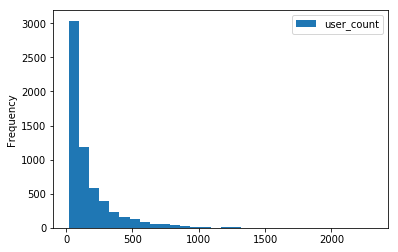

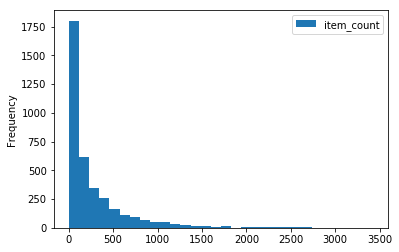

In [56]:
# !! hadoop fs -ls data/ml-1m/result/itemCF
import matplotlib.pyplot as plt
%matplotlib inline
n = ratingDf.count()
ui_count  = ratingDf.agg(count('*').alias('ui'))
user_count = ratingDf.groupBy('user').agg(count('*').alias('user_count'))
item_count = ratingDf.groupBy('item').agg(count('*').alias('item_count'))
count_union = user_count.describe('user_count')\
          .join(item_count.describe('item_count'),on='summary',how='inner')
count_union.show()
print '稀疏度：%f%%' % (n/(6040*3706*1.0)*100)
user_count.toPandas().plot.hist(bins=30)
item_count.toPandas().plot.hist(bins=30)

In [10]:
sc.stop()
spark.stop()